# 第6章 k平均法：教師なし学習モデルの基礎

## 「06-k_means.py」の解説

ITエンジニアための機械学習理論入門「第6章 k平均法:教師なし学習モデルの基礎」で使用しているサンプルコード「06-k_means.py」の解説です。

※ 解説用にコードの内容は少し変更しています。
※ 講義で準備した環境(Python3系)で動作するようにいくつか修正・追加を行っています。

はじめに必要なモジュールをインポートしておきます。

特に、画像データを扱うためにPILモジュールを利用します。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from PIL import Image

画像ファイル「photo.jpg」が用意されていることを確認します。

In [2]:
ls -l photo.jpg

 ドライブ C のボリューム ラベルは Local Disk です
 ボリューム シリアル番号は E674-35BF です

 C:\Users\hirok\MachineLearning_Lecture\jupyter_ml4se のディレクトリ


 C:\Users\hirok\MachineLearning_Lecture\jupyter_ml4se のディレクトリ

2018/11/14  15:04            47,187 photo.jpg
               1 個のファイル              47,187 バイト
               0 個のディレクトリ  235,078,746,112 バイトの空き領域


画像ファイル「photo.jpg」を読み込みます。

In [3]:
im = Image.open("photo.jpg")    

画像を表示してみます。白、赤、緑の３色を中心に構成された画像です。

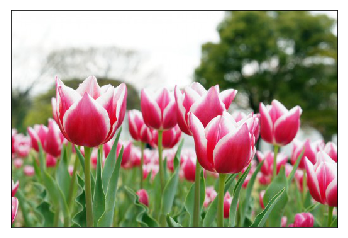

In [4]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

画像データを各ピクセルの (R,G,B) を並べたリストに変換します。

In [5]:
pixels = list(im.convert('RGB').getdata())    

リストの先頭部分を確認すると、次のようになります。

In [6]:
pixels[:10]

[(251, 253, 252),
 (250, 252, 251),
 (250, 252, 251),
 (250, 252, 251),
 (251, 253, 252),
 (252, 254, 253),
 (253, 255, 254),
 (255, 255, 255),
 (254, 254, 254),
 (254, 254, 254)]

このリストから、k平均法で「代表色」を決定する関数を用意します。

k個の代表色を決定して、各ピクセルを代表色に置き換えたリストを返します。

In [25]:
def run_kmeans(pixels, k):
    cls = [0] * len(pixels)

    # 代表色の初期値をランダムに設定
    center = []
    for i in range(k):
        center.append(np.array([randint(256), randint(256), randint(256)]))
    print("Initial centers:"),
    print(map(lambda x: x.tolist(), center))
    print("========================")
    distortion = 0.0

    # 最大50回のIterationを実施
    for iter_num in range(50): 
        center_new = []
        for i in range(k):
            center_new.append(np.array([0,0,0]))
        num_points = [0] * k
        distortion_new = 0.0

        # E Phase: 各データが属するグループ（代表色）を計算
        for pix, point in enumerate(pixels):
            min_dist = 256*256*3
            point = np.array(point)
            for i in range(k):
                d = sum([x*x for x in point-center[i]])
                if d < min_dist:
                    min_dist = d
                    cls[pix] = i
            center_new[cls[pix]] += point
            num_points[cls[pix]] += 1
            distortion_new += min_dist

        # M Phase: 新しい代表色を計算
        for i in range(k):
            if num_points[i] == 0:
                center_new[i] = np.array([0,0,0])
            else:
                center_new[i] = center_new[i] / num_points[i]
        center = center_new
        print(map(lambda x: x.tolist(), center))
        print("Distortion: J=%d" % distortion_new)

        # Distortion(J)の変化が0.1%未満になったら終了
        if iter_num > 0 and distortion - distortion_new < distortion * 0.001:
            break
        distortion = distortion_new
        
    # 画像データの各ピクセルを代表色で置き換え
    new_pixels = []
    for pix in range(len(pixels)):
        new_pixels.append(tuple(center[cls[pix]]))

    print("Done.")
    return new_pixels

例として、2つのクラスターに分類します。

In [26]:
result = run_kmeans(pixels, 2)

Initial centers:
Distortion: J=3296471901
Distortion: J=1403523462
Distortion: J=990689539
Distortion: J=910975139
Distortion: J=900139777
Distortion: J=898860200
Distortion: J=898714833
Done.


結果を画像として表示します。

In [38]:
# float から int に変換 (Python3系のみ)
result_int = []
for i in range(len(result)):
    tmp_result = tuple(map(int, result[i]))
    result_int.append(tmp_result)

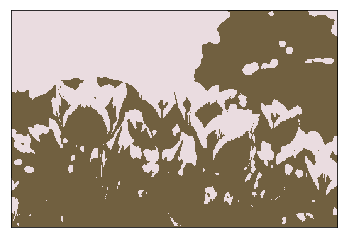

In [36]:
im.putdata(result_int)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

同様に3つのクラスターに分類します。

In [37]:
result = run_kmeans(pixels, 3)

Initial centers:
Distortion: J=1771630128
Distortion: J=704477459
Distortion: J=641234386
Distortion: J=619009285
Distortion: J=605796006
Distortion: J=596741485
Distortion: J=590643038
Distortion: J=586503269
Distortion: J=583763189
Distortion: J=581821401
Distortion: J=580381449
Distortion: J=579324556
Distortion: J=578570542
Distortion: J=577982800
Distortion: J=577535432
Done.


結果を画像として表示します。

「白、赤、緑」が抽出されていることがわかります。

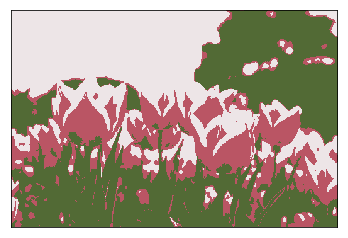

In [39]:
result_int = []
for i in range(len(result)):
    tmp_result = tuple(map(int, result[i]))
    result_int.append(tmp_result)

im.putdata(result_int)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

最後に、8つのクラスターに分類して、結果を画像として表示してみます。

In [40]:
result = run_kmeans(pixels, 8)

Initial centers:
Distortion: J=1880227816
Distortion: J=269347043
Distortion: J=195127532
Distortion: J=184855179
Distortion: J=180308140
Distortion: J=175076780
Distortion: J=166121826
Distortion: J=156695999
Distortion: J=151524600
Distortion: J=149058256
Distortion: J=147643179
Distortion: J=146661136
Distortion: J=145859833
Distortion: J=145146142
Distortion: J=144482669
Distortion: J=143851511
Distortion: J=143283403
Distortion: J=142775544
Distortion: J=142308518
Distortion: J=141871179
Distortion: J=141473733
Distortion: J=141129421
Distortion: J=140821766
Distortion: J=140568465
Distortion: J=140357371
Distortion: J=140185025
Distortion: J=140049078
Done.


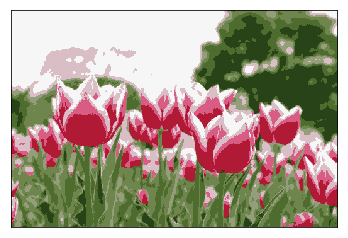

In [41]:
result_int = []
for i in range(len(result)):
    tmp_result = tuple(map(int, result[i]))
    result_int.append(tmp_result)

im.putdata(result_int)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

インターネットから好きな画像をダウンロードして試すこともできます。ここでは、無償利用可能なフリー素材をダウンロードしてみます。

In [42]:
!curl -OL http://2.bp.blogspot.com/-4SSFZUa0ab4/Vg57ivCMfhI/AAAAAAAAyzQ/Pm4eBFxAaOc/s800/sweets_fruit_pafe.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  308k  100  308k    0     0  4896k      0 --:--:-- --:--:-- --:--:-- 4896k


ダウンロードしたファイルを確認します。

In [45]:
!dir *.png # windowsの場合
#!ls *.png # macの場合

 ドライブ C のボリューム ラベルは Local Disk です
 ボリューム シリアル番号は E674-35BF です

 C:\Users\hirok\MachineLearning_Lecture\jupyter_ml4se のディレクトリ

2018/11/14  15:25           315,909 sweets_fruit_pafe.png

 C:\Users\hirok\MachineLearning_Lecture\jupyter_ml4se のディレクトリ


 C:\Users\hirok\MachineLearning_Lecture\jupyter_ml4se のディレクトリ

               1 個のファイル             315,909 バイト
               0 個のディレクトリ  235,076,947,968 バイトの空き領域


ファイルを読み込んで表示します。

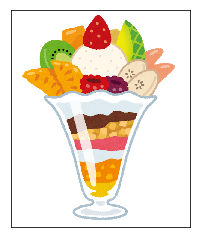

In [46]:
im = Image.open("sweets_fruit_pafe.png")
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

RBG形式のデータに変換して、5つのクラスターに分類します。背景の透明色部分は、黒色に変換される点に注意してください。

In [47]:
pixels = list(im.convert('RGB').getdata())
result = run_kmeans(pixels, 5)

Initial centers:
Distortion: J=7215661526
Distortion: J=629322561
Distortion: J=560469257
Distortion: J=558267662
Distortion: J=556932940
Distortion: J=556430446
Done.


結果を表示して確認します。

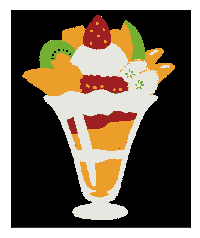

In [48]:
result_int = []
for i in range(len(result)):
    tmp_result = tuple(map(int, result[i]))
    result_int.append(tmp_result)

im.putdata(result_int)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)